# Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
data = pd.read_csv("data_clean.csv", index_col=0)

In [4]:
data

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1     41.0    190.0   7.4     67     5    1  2010    67       S
2     36.0    118.0   8.0     72     5    2  2010    72       C
3     12.0    149.0  12.6     74     5    3  2010    74      PS
4     18.0    313.0  11.5     62     5    4  2010    62       S
5      NaN      NaN  14.3     56     5    5  2010    56       S
..     ...      ...   ...    ...   ...  ...   ...   ...     ...
154   41.0    190.0   7.4     67     5    1  2010    67       C
155   30.0    193.0   6.9     70     9   26  2010    70      PS
156    NaN    145.0  13.2     77     9   27  2010    77       S
157   14.0    191.0  14.3     75     9   28  2010    75       S
158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 9 columns]

In [5]:
data.head()

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     67     5    1  2010    67       S
2   36.0    118.0   8.0     72     5    2  2010    72       C
3   12.0    149.0  12.6     74     5    3  2010    74      PS
4   18.0    313.0  11.5     62     5    4  2010    62       S
5    NaN      NaN  14.3     56     5    5  2010    56       S

In [6]:
data.tail(10)

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
149   30.0    193.0   6.9     70     9   26  2010    70       C
150    NaN    145.0  13.2     77     9   27  2010    77      PS
151   14.0    191.0  14.3     75     9   28  2010    75       S
152   18.0    131.0   8.0     76     9   29  2010    76      PS
153   20.0    223.0  11.5     68     9   30  2010    68       S
154   41.0    190.0   7.4     67     5    1  2010    67       C
155   30.0    193.0   6.9     70     9   26  2010    70      PS
156    NaN    145.0  13.2     77     9   27  2010    77       S
157   14.0    191.0  14.3     75     9   28  2010    75       S
158   18.0    131.0   8.0     76     9   29  2010    76       C

In [7]:
#Data Structure 
data.shape

(158, 9)

In [8]:
#data types
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

# Data type conversion

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [10]:
data['Month'] = pd.to_numeric( data['Month'], errors='coerce' )
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category')           #data['Wind']=data['Wind'].astype('int64')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


####More on data type conversions
[link text](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

# Duplicates

In [12]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [13]:
data

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
1     41.0    190.0   7.4    67.0    5.0    1  2010    67       S
2     36.0    118.0   8.0    72.0    5.0    2  2010    72       C
3     12.0    149.0  12.6    74.0    5.0    3  2010    74      PS
4     18.0    313.0  11.5    62.0    5.0    4  2010    62       S
5      NaN      NaN  14.3    56.0    5.0    5  2010    56       S
..     ...      ...   ...     ...    ...  ...   ...   ...     ...
154   41.0    190.0   7.4    67.0    5.0    1  2010    67       C
155   30.0    193.0   6.9    70.0    9.0   26  2010    70      PS
156    NaN    145.0  13.2    77.0    9.0   27  2010    77       S
157   14.0    191.0  14.3    75.0    9.0   28  2010    75       S
158   18.0    131.0   8.0    76.0    9.0   29  2010    76       C

[158 rows x 9 columns]

In [14]:
#Print the duplicated rows
data[data.duplicated()]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
157   14.0    191.0  14.3    75.0    9.0   28  2010    75       S

In [15]:
data_cleaned1=data.drop_duplicates()

In [16]:
data_cleaned1.shape

(157, 9)

# Drop columns

In [17]:
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)

In [18]:
data_cleaned2

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
1     41.0    190.0   7.4    5.0    1  2010    67       S
2     36.0    118.0   8.0    5.0    2  2010    72       C
3     12.0    149.0  12.6    5.0    3  2010    74      PS
4     18.0    313.0  11.5    5.0    4  2010    62       S
5      NaN      NaN  14.3    5.0    5  2010    56       S
..     ...      ...   ...    ...  ...   ...   ...     ...
153   20.0    223.0  11.5    9.0   30  2010    68       S
154   41.0    190.0   7.4    5.0    1  2010    67       C
155   30.0    193.0   6.9    9.0   26  2010    70      PS
156    NaN    145.0  13.2    9.0   27  2010    77       S
158   18.0    131.0   8.0    9.0   29  2010    76       C

[157 rows x 8 columns]

In [19]:
data_cleaned2['Year'].unique()

array([2010])

In [20]:
data_cleaned2.drop('Year', axis = 1, inplace=True)

In [21]:
data_cleaned2.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Month', 'Day', 'Temp', 'Weather'], dtype='object')

# Rename the columns

In [22]:
#rename the Solar column
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [23]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Temp Weather
1     41.0  190.0   7.4    5.0    1    67       S
2     36.0  118.0   8.0    5.0    2    72       C
3     12.0  149.0  12.6    5.0    3    74      PS
4     18.0  313.0  11.5    5.0    4    62       S
5      NaN    NaN  14.3    5.0    5    56       S
..     ...    ...   ...    ...  ...   ...     ...
153   20.0  223.0  11.5    9.0   30    68       S
154   41.0  190.0   7.4    5.0    1    67       C
155   30.0  193.0   6.9    9.0   26    70      PS
156    NaN  145.0  13.2    9.0   27    77       S
158   18.0  131.0   8.0    9.0   29    76       C

[157 rows x 7 columns]

# Outlier Detection

<AxesSubplot:>

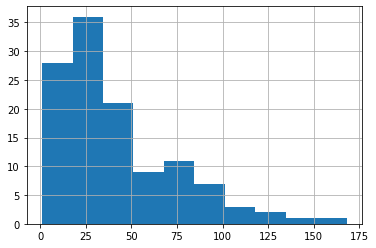

In [24]:
# histogram of Ozone
data_cleaned3['Ozone'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb27822faf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2782401f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb27822f790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2782408b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb278240c10>],
 'means': []}

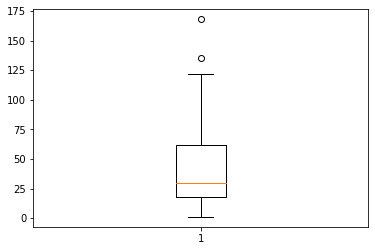

In [25]:
#Box plot
data_box=data_cleaned3.dropna()
data1_box=data_box.Ozone
plt.boxplot(data1_box)

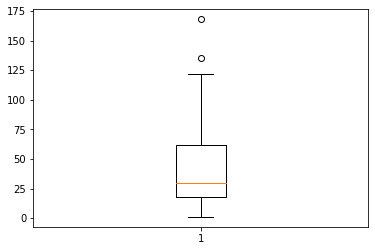

In [26]:
#Extracting outliers
box=plt.boxplot(data1_box)

In [27]:
box

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb258c4ad90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb258c58490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb258c4aa30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb258c58b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb258c58eb0>],
 'means': []}

In [28]:
type(box['fliers'])

list

In [29]:
for elem in box['fliers']:
    print(elem)
    print(elem.get_ydata())


Line2D(_line6)
[135. 168.]


In [30]:
for elem in box['whiskers']:
    print(elem)
    print(elem.get_ydata())

Line2D(_line1)
[18.  1.]
Line2D(_line2)
[ 62. 122.]


In [31]:
[item.get_ydata() for item in box['fliers']] #fliers are outliers

[array([135., 168.])]

In [32]:
#To get the whiskers
[item.get_ydata()[1] for item in box['whiskers']]

[1.0, 122.0]

In [33]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [34]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Temp Weather
1     41.0  190.0   7.4    5.0    1    67       S
2     36.0  118.0   8.0    5.0    2    72       C
3     12.0  149.0  12.6    5.0    3    74      PS
4     18.0  313.0  11.5    5.0    4    62       S
5      NaN    NaN  14.3    5.0    5    56       S
..     ...    ...   ...    ...  ...   ...     ...
153   20.0  223.0  11.5    9.0   30    68       S
154   41.0  190.0   7.4    5.0    1    67       C
155   30.0  193.0   6.9    9.0   26    70      PS
156    NaN  145.0  13.2    9.0   27    77       S
158   18.0  131.0   8.0    9.0   29    76       C

[157 rows x 7 columns]

<AxesSubplot:>

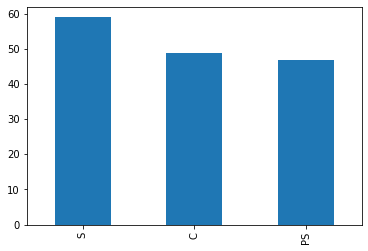

In [35]:
#Bar plot
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

<AxesSubplot:>

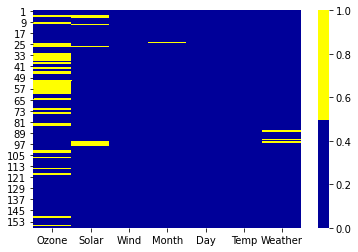

In [36]:
import seaborn as sns
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [37]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Temp        0
Weather     3
dtype: int64

In [38]:
#Mean Imputation
mean_val = data_cleaned3['Ozone'].mean()
print(mean_val)

41.81512605042017


In [39]:
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean_val)

In [40]:
data_cleaned3.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Temp       0
Weather    3
dtype: int64

In [41]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Temp Weather
1    41.000000  190.0   7.4    5.0    1    67       S
2    36.000000  118.0   8.0    5.0    2    72       C
3    12.000000  149.0  12.6    5.0    3    74      PS
4    18.000000  313.0  11.5    5.0    4    62       S
5    41.815126    NaN  14.3    5.0    5    56       S
..         ...    ...   ...    ...  ...   ...     ...
153  20.000000  223.0  11.5    9.0   30    68       S
154  41.000000  190.0   7.4    5.0    1    67       C
155  30.000000  193.0   6.9    9.0   26    70      PS
156  41.815126  145.0  13.2    9.0   27    77       S
158  18.000000  131.0   8.0    9.0   29    76       C

[157 rows x 7 columns]

In [42]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned3[['Weather']]

In [43]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [74]:
weather_mode = obj_columns.mode().iloc[0]

Weather    S
Name: 0, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [45]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna(   weather_mode   )

In [46]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [75]:
obj_columns

Weather
1         S
2         C
3        PS
4         S
5         S
..      ...
153       S
154       C
155      PS
156       S
158       C

[157 rows x 1 columns]

In [47]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Temp Weather
1    41.000000  190.0   7.4    5.0    1    67       S
2    36.000000  118.0   8.0    5.0    2    72       C
3    12.000000  149.0  12.6    5.0    3    74      PS
4    18.000000  313.0  11.5    5.0    4    62       S
5    41.815126    NaN  14.3    5.0    5    56       S
..         ...    ...   ...    ...  ...   ...     ...
153  20.000000  223.0  11.5    9.0   30    68       S
154  41.000000  190.0   7.4    5.0    1    67       C
155  30.000000  193.0   6.9    9.0   26    70      PS
156  41.815126  145.0  13.2    9.0   27    77       S
158  18.000000  131.0   8.0    9.0   29    76       C

[157 rows x 7 columns]

In [48]:
obj_columns.shape

(157, 1)

In [49]:
data_cleaned3.drop(['Weather'],axis=1,inplace=True)

In [50]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [51]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Temp       0
Weather    0
dtype: int64

In [52]:
data_cleaned4

Ozone  Solar  Wind  Month  Day  Temp Weather
1    41.000000  190.0   7.4    5.0    1    67       S
2    36.000000  118.0   8.0    5.0    2    72       C
3    12.000000  149.0  12.6    5.0    3    74      PS
4    18.000000  313.0  11.5    5.0    4    62       S
5    41.815126    NaN  14.3    5.0    5    56       S
..         ...    ...   ...    ...  ...   ...     ...
153  20.000000  223.0  11.5    9.0   30    68       S
154  41.000000  190.0   7.4    5.0    1    67       C
155  30.000000  193.0   6.9    9.0   26    70      PS
156  41.815126  145.0  13.2    9.0   27    77       S
158  18.000000  131.0   8.0    9.0   29    76       C

[157 rows x 7 columns]

In [53]:
data_cleaned4.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temp', 'Weather'], dtype='object')

# Scatter plot and Correlation analysis

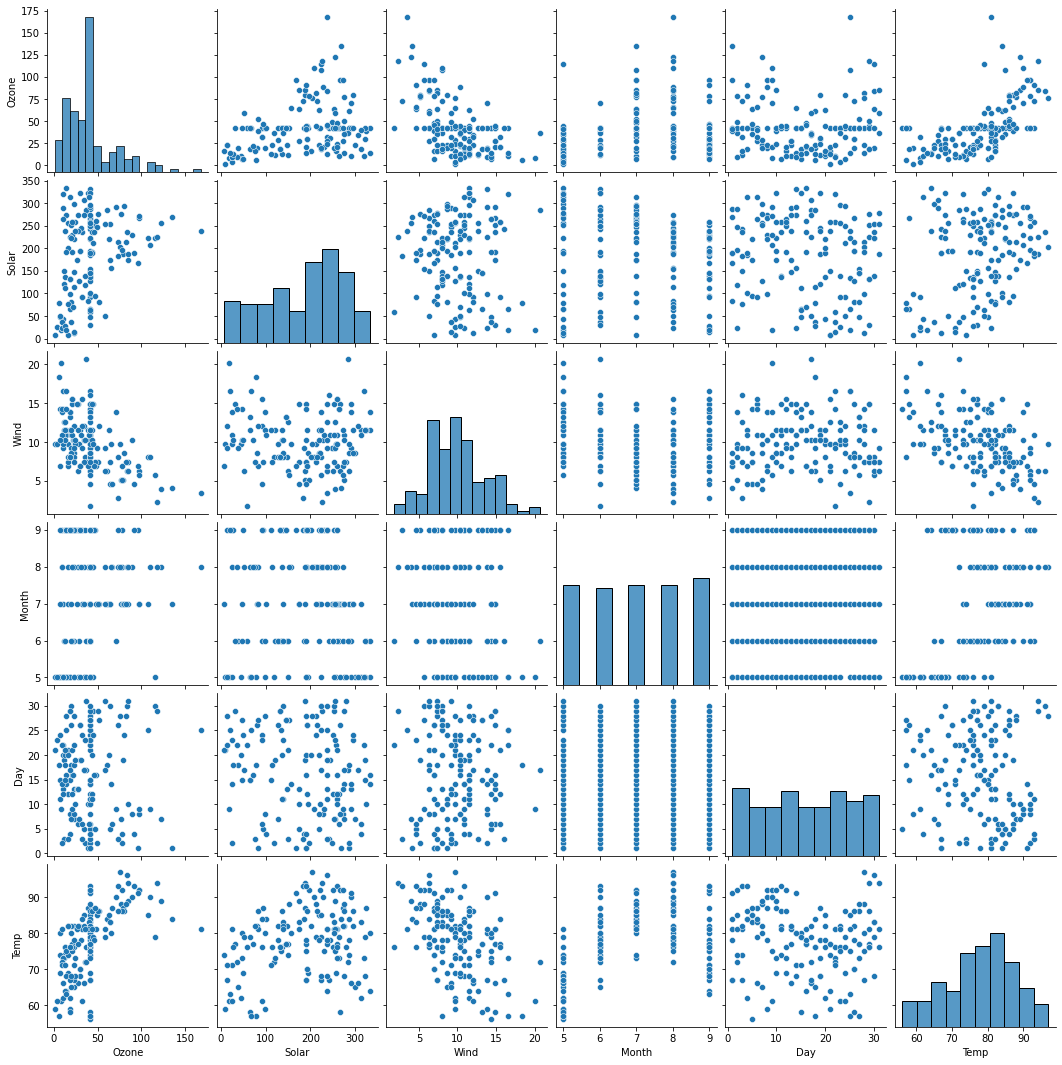

In [54]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned4)

In [55]:
#Correlation
data_cleaned4.corr()

Ozone     Solar      Wind     Month       Day      Temp
Ozone  1.000000  0.308687 -0.520004  0.132860 -0.021916  0.606500
Solar  0.308687  1.000000 -0.057407 -0.094012 -0.155663  0.273558
Wind  -0.520004 -0.057407  1.000000 -0.166216  0.029900 -0.441228
Month  0.132860 -0.094012 -0.166216  1.000000  0.050055  0.398516
Day   -0.021916 -0.155663  0.029900  0.050055  1.000000 -0.122787
Temp   0.606500  0.273558 -0.441228  0.398516 -0.122787  1.000000

# Transformations

#### Dummy Variable

In [56]:
data_cleaned4

Ozone  Solar  Wind  Month  Day  Temp Weather
1    41.000000  190.0   7.4    5.0    1    67       S
2    36.000000  118.0   8.0    5.0    2    72       C
3    12.000000  149.0  12.6    5.0    3    74      PS
4    18.000000  313.0  11.5    5.0    4    62       S
5    41.815126    NaN  14.3    5.0    5    56       S
..         ...    ...   ...    ...  ...   ...     ...
153  20.000000  223.0  11.5    9.0   30    68       S
154  41.000000  190.0   7.4    5.0    1    67       C
155  30.000000  193.0   6.9    9.0   26    70      PS
156  41.815126  145.0  13.2    9.0   27    77       S
158  18.000000  131.0   8.0    9.0   29    76       C

[157 rows x 7 columns]

In [57]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Weather'])

In [58]:
data_cleaned4

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp  Weather_C  \
1     41.0    190.0   7.4    67.0    5.0    1  2010    67          0   
2     36.0    118.0   8.0    72.0    5.0    2  2010    72          1   
3     12.0    149.0  12.6    74.0    5.0    3  2010    74          0   
4     18.0    313.0  11.5    62.0    5.0    4  2010    62          0   
5      NaN      NaN  14.3    56.0    5.0    5  2010    56          0   
..     ...      ...   ...     ...    ...  ...   ...   ...        ...   
154   41.0    190.0   7.4    67.0    5.0    1  2010    67          1   
155   30.0    193.0   6.9    70.0    9.0   26  2010    70          0   
156    NaN    145.0  13.2    77.0    9.0   27  2010    77          0   
157   14.0    191.0  14.3    75.0    9.0   28  2010    75          0   
158   18.0    131.0   8.0    76.0    9.0   29  2010    76          1   

     Weather_PS  Weather_S  
1             0          1  
2             0          0  
3             1          0  
4             0          1  
5             0          1  
..          ...        ...  
154           0          0  
155           1          0  
156           0          1  
157           0          1  
158           0          0  

[158 rows x 11 columns]

In [59]:
data_cleaned4=data_cleaned4.dropna()

#### Normalization of the data

In [60]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [61]:
data_cleaned4.values

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [ 30. , 193. ,   6.9, ...,   0. ,   1. ,   0. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [77]:
array = data_cleaned4.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.24 0.56 0.28 0.25 0.   0.   0.   0.25 0.   0.   1.  ]
 [0.21 0.34 0.31 0.38 0.   0.03 0.   0.38 1.   0.   0.  ]
 [0.07 0.43 0.56 0.43 0.   0.07 0.   0.43 0.   1.   0.  ]
 [0.1  0.94 0.5  0.12 0.   0.1  0.   0.12 0.   0.   1.  ]
 [0.13 0.89 0.34 0.2  0.   0.2  0.   0.2  0.   1.   0.  ]]


In [63]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [79]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.02  0.05 -0.71 -1.15 -1.53 -1.7   0.   -1.15 -0.64 -0.68  1.28]
 [-0.17 -0.75 -0.54 -0.62 -1.53 -1.59  0.   -0.62  1.57 -0.68 -0.78]
 [-0.9  -0.41  0.77 -0.4  -1.53 -1.48  0.   -0.4  -0.64  1.47 -0.78]
 [-0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -0.64 -0.68  1.28]
 [-0.57  1.27 -0.37 -1.37 -1.53 -1.02  0.   -1.37 -0.64  1.47 -0.78]]


# Speed up the EDA process

In [65]:
#!pip install pandas-profiling==2.7.1
#!pip install sweetviz

In [66]:
import pandas_profiling as pp
import sweetviz as sv

In [67]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

In [68]:
#sweet_report = sv.analyze(data)
#sweet_report.show_html('weather_report.html')